In [2]:
# Slides for Probability and Statistics module, 2015-2016
# Matt Watkins, University of Lincoln

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Hypothesis Testing

This is another part of statistical inference.

Before Easter we we estimated or inferred the values of population parameters (mean and variance) from statistical data.

Last week we looked at confidence intervals - we estimated or inferred the range of values of population parameters with a certain degree of probability or confidence

This week we look at some methods to make decisions based on these estimates.

**Example**

Suppose we'd been following some population over a period of time and found it to be normally distributed with mean $\mu$ and standard deviation $\sigma$. Now, for some reason we have a suspicion that the the mean has changed in some way. 

We want to formulate some test that would allow us to make an informed decision whether our suspicions were correct or not. How should we attack this?

## Summary of procedure to test if the population mean is $\mu$ and $\sigma$ is known

- define $H_0$ and $H_1$
- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas corresponding to the significance level and the hypotheses using a normal distribution.
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}} \sim N(0,1) \text{ (if our assumptions are correct)}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition

All this applies to other population parameters or sample statistics - we just need to use appropriate distributions.

**example**

A machine produces components whose lengths should be distributed Normally with mean 0.160 cm and standard deviation 0.012 cm. 

A sample of 100 is drawn and the sample mean computed as 0.157 cm. 

- Is there any evidence at the 5% level that the mean of component lengths has changed?

We are given that $\mu=0.160$, $\sigma=0.012$, $\bar{x}=0.157$ and $N=100$.

- We assume that the component lengths are distributed as $N(0.16,(0.012)^2)$.
- A 5% significance level gives us critical $z$ values of $\pm 1.96$, so the rejection areas are as we just saw.
- We calculate our standardized test statistic, here its value is
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}} = \frac{0.157-0.160}{0.012/\sqrt{100}} = -2.5
$$
- The above value lies in our rejection region, and so is significant at the 5% level.
- Therefore, the original assumption can be rejected and we have shown that there is evidence at the 5% level that the mean of the component lengths has changed.
- Note that $\bar{x}$ is pretty close to $\mu$ - but the standard deviation is small, and the sample size is large - both give allow us to resolve smaller differences between the sample and assumed population mean. 

## Disection of the results that we use

- $\bar{X} \sim N(\mu, \sigma^2/N)$

how does this come about?

$\bar{X} \sim N(\mu, \sigma^2/N)$

If $X_i \sim N(\mu,\sigma^2)$ then we can look at 

$\bar{X} = \frac{1}{N}(X_1 + X_2 + \ldots + X_n)$

We saw last week that standard normal distributed random variables have moment generating functions $e^{t^2/2}$.

This is a special case of a normal distribution, $N(\mu, \sigma^2)$ having moment generating function $$e^{\mu t + \frac{\sigma^2 t^2}{2 }}$$

We also saw that, if $X$ and $Y$ are independent, then $e^{tX}$ and $e^{tY}$ are too. Then we have a new random variable $Z = X + Y$ has a generating function 

$$
\begin{align}
g_Z(t) & = \text{E[$e^{tZ}$]} = \text{E[$e^{t(X + Y)}$]} \\
       & = \text{E[$e^{tX}$]} \text{E[$e^{tY}$]} \\
       & = g_X(t) g_Y(t)
\end{align}
$$

If $X^* = X/N$

$$
g_{X^*}(t) = \text{E[$e^{tX^*}$]} = \text{E[$e^{\frac{tX}{N}}$]} = g_{X}(t/N)
$$


So we expect $\bar{X} = \frac{1}{N}(X_1 + \cdots + X_N)$ to have moment generating function 

$$
\begin{align}
g_{X_1}(t/N) \cdot g_{X_2}(t/N) \cdots g_{X_N}(t/N) & = \big(e^{\mu t/N + \frac{\sigma^2 (t/N)^2}{2 }}\big) \cdots \big( e^{\mu t + \frac{\sigma^2 t^2}{2N }} \big) \\ 
& = e^{ N\mu t/N + \frac{ N \sigma^2 (t/N)^2}{2 }} \\
& = e^{ \mu t + \frac{ \sigma^2 t^2}{2N }} 
\end{align}
$$

which is the moment generating function of a normal distribution with mean = $\mu$ and standard deviation = $\frac{\sigma}{\sqrt{N}}$. 

As the moment generating function fully defines the random variable, this implies that

$$
\bar{X} \sim N(\mu, \frac{\sigma^2}{N})
$$


If $X_i$ aren't $\sim N(\mu, \sigma^2)$ then we can use the Central Limit Theorem as long as $N$ is biggish ($N$ can be smaller the closer the $X_i$ are to being normally distributed themselves).

## Disection of the results that we use

- $\bar{X} \sim N(\mu, \sigma^2/N)$


- If  

$$\bar{X} \sim N(\mu, \sigma^2/N)$$

then 

$$
\frac{\bar{X} - \mu}{\sigma/\sqrt{N}} \sim N(0, 1)
$$

we can use the same moment generating technique to show that this transformation is valid

- If  $\bar{X} \sim N(\mu, \sigma^2/N)$ then  $\frac{\bar{X} - \mu}{\sigma/\sqrt{N}} \sim N(0, 1)$

If a random variable $X \sim N(\mu,\sigma^2/N)$ then let us consider a random variable $Z = \alpha X + \beta$

$Z$ has moment generating function

$$
\begin{align}
\text{E[$e^{tZ}$]} & = \text{E[$e^{t(\alpha X + \beta)}$]} \\
                   & = e^{t\beta}\text{E[$e^{t\alpha X}$]}  \\
                   & = e^{t\beta} \exp\{\mu \alpha t + \sigma^2 (\alpha t)^2 /2N\} \\
                   & = \exp\{ ( \beta + \mu \alpha ) t + \sigma^2 \alpha^2 t^2 /2N\ \}
\end{align}
$$

the last expression is the generating function of a normal distribution with mean = $\beta + \mu \alpha$ and variance $\sigma^2 \alpha^2 / N$.

$\implies Z \sim N(\beta + \mu \alpha, \sigma^2 \alpha^2)$

so if we choose the particular $\alpha$ and $\beta$ so that

$$
Z = \frac{X - \mu}{\sigma / \sqrt{N}}
$$

given that $X \sim N(\mu,\sigma^2/N)$, $Z \sim N(0,1)$, as we want.

You can also prove this by a change of variables and fairly standard calculus, but the moment generating function method is easier (to my mind).


## Disection of the results that we use

- $\bar{X} \sim N(\mu, \sigma^2/N)$
- If  $\bar{X} \sim N(\mu, \sigma^2/N)$ then  $\frac{\bar{X} - \mu}{\sigma/\sqrt{N}} \sim N(0, 1)$

## Test for the mean when the variance is unknown

exactly like the confidence interval case, if we do not know the variance we approxiate it with the sample variance. We use the random variable

$$
\frac{\bar{X} - \mu}{S/\sqrt{N}}
$$

and test the test statistic

$$
\frac{\bar{x} - \mu}{S/\sqrt{N}}
$$

against a t distribution with $(N-1)$ degrees of freedom.

## Summary of procedure to test if the population mean is $\mu$ and $\sigma$ unknown

- define $H_0$ and $H_1$
- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas corresponding to the significance level and the hypotheses.
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{S/\sqrt{N}} \sim t(N-1) \text{ (if our assumptions are correct)}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition

## Power of a test

Now we've seen practically how the tests work (and filled in the theory behind some of it) it is important to understand a difficulty that arises - false negatives and false positives.

These two types of error are

- type I, false negative, we reject the null hypothesis when it is in fact true.
- type II, false positive, we accept the null hypothesis when the sample actually comes from another distribution



### Type I errors 

these are fairly straightforward, and controllable.

If we look at our rejection region

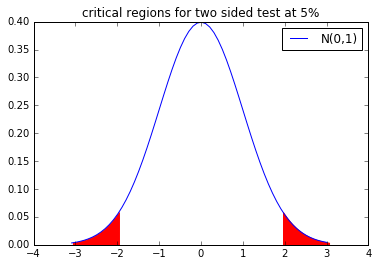

In [4]:
fig, ax = plt.subplots(1, 1)

x = np.arange(- stats.norm.ppf(0.999),stats.norm.ppf(0.999),0.1)

two_sided = True
critical_value = 0.95
if two_sided:
    critical_value = 0.95 + (1-0.95)/2
zc =  stats.norm.ppf(critical_value)

ax.plot(x, stats.norm.pdf(x), '-', ms=4, label='N(0,1)');

section = np.arange(zc, stats.norm.ppf(0.999), 0.1)
plt.fill_between(section,stats.norm.pdf(section), color='r');
plt.fill_between(-section,stats.norm.pdf(section), color='r');

ax.set_title("critical regions for two sided test at 5%");

ax.legend();



we can directly see that the probability of getting a false negative is $\alpha$, our significance level. This gives the probability of our random sample just happening to give a value within the rejection region.

In that case why not just take $\alpha$ really small?

### Type II errors 

these are much harder, often impossible, to quantify. 

This is the error that occurs, conventionally with probability $\beta$, that the null hypothesis is accepted when it should be rejected.

In other words our test shows that the test statistic could well have come from the distribution we are testing, but actually comes from another...

Lets consider the case where we think that the sample comes from something $\sim N(20,2)$, but in fact the mean had moved to 25, so really the sample is from $N(25,2)$. When would we make errors?

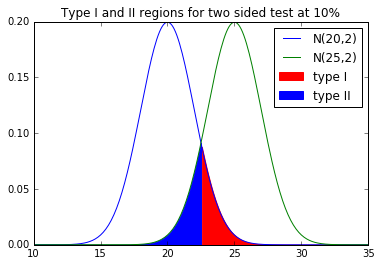

In [42]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0,50,0.1)

H0mu = 20
H1mu = 25
sigma =2.0

ax.plot(x, stats.norm.pdf(x,loc=H0mu,scale=sigma), '-', ms=4, label='N(20,2)');

alphasection = np.arange(stats.norm.ppf(0.90,loc=20,scale=2.0), 50, 0.1)
plt.fill_between(alphasection,stats.norm.pdf(alphasection,loc=20,scale=2.0), color='r', label='type I');

ax.plot(x, stats.norm.pdf(x,loc=25,scale=2.0), '-', ms=4, label='N(25,2)');

betasection = np.arange(0,stats.norm.ppf(0.90,loc=20,scale=2.0), 0.1)
plt.fill_between(betasection,stats.norm.pdf(betasection,loc=25,scale=2.0), color='b', label='type II');

ax.set_title("Type I and II regions for two sided test at 10%");
ax.set_xbound(10,35)

ax.legend();


the two types or error are coloured red and blue.

- type I (red) - this can occur if the sample was really pulled from the distribution of $H_0$, but the random sample happens to produce an unlikely, but not impossible error - if the error chance is less than $\alpha$
- type II (blue) - this occurs if the actual distribution the sample comes from is not that of $H_0$, but instead has a different real  $\mu$. The probability of the type II error is $\beta$, and in this case it is a function of the real population mean $\beta(\mu)$.

To show that $\beta(\mu)$ we can plot the same graphs but for different values of $\mu$

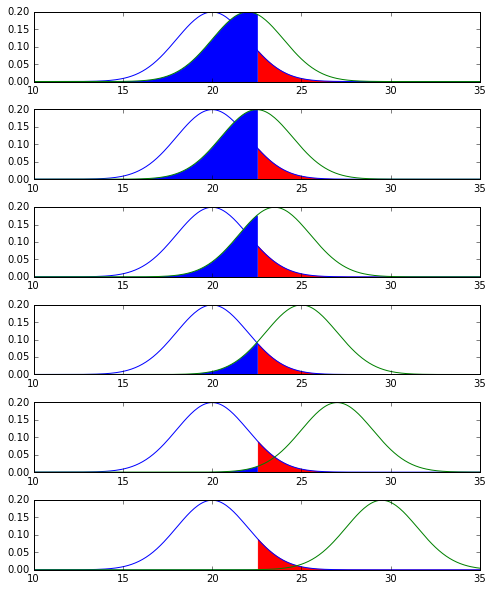

In [63]:
fig, ax = plt.subplots(6, 1,figsize=(8, 10))

x = np.arange(0,50,0.1)

H0mu = 20
H1mu = 22
sigma =2.0

for i in range(0,6):
    H1mu = H1mu+i/2
    ax[i].plot(x, stats.norm.pdf(x,loc=H0mu,scale=sigma), '-', ms=4, label='H2');
    alphasection = np.arange(stats.norm.ppf(0.90,loc=H0mu,scale=sigma), 50, 0.1)
    ax[i].fill_between(alphasection,stats.norm.pdf(alphasection,loc=H0mu,scale=sigma), color='r', label='type I');

    ax[i].plot(x, stats.norm.pdf(x,loc=H1mu,scale=sigma), '-', ms=4, label='H1');

    betasection = np.arange(0,stats.norm.ppf(0.90,loc=H0mu,scale=sigma), 0.1)
    ax[i].fill_between(betasection,stats.norm.pdf(betasection,loc=H1mu,scale=sigma), color='b', label='type II');
    ax[i].set_xbound(10,35)

fig.subplots_adjust(hspace=0.4)

As we know the true distribution then we can work out $\beta(\mu)$ in this case. It can be very complicated in general.

**definition**

The **power** of a test is $(1-\beta)$

The larger the power the better the test is at distinguishing between the alternative hypotheses.

In general, when preparing a test the aim should be to have both alpha and beta small. Increasing $\alpha$ will decrease $\beta$, so there is a balance between the risks associated with type I and type II errors.

## Other tests

- test for the variance 
    - we saw in the lectures on confidence limits that the test statistic $\frac{(N-1)}{\sigma^2}S^2 \sim \chi^2(N-1)$
    - we'd calculate rejection regions in the same manner as for the tests of the mean, but using this statistic and the $\chi^2$ distribution

other statistics can also be devised and tested, such as
    
- test for the correlation coefficient
- tests for difference of means of two sets of data

# Summary

### Testing the mean when the variance is known

- define $H_0$ and $H_1$
- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas corresponding to the significance level and the hypotheses.
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{\sigma/\sqrt{N}}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition

### Testing the mean when the variance is unknown

- define $H_0$ and $H_1$
- assume that the population mean is $\mu$
- choose a significance level, $\alpha \cdot 100$%, and calculate the corresponding critical values and rejection areas corresponding to the significance level and the hypotheses.
- take a random sample of size $N$ from the population under consideration
- calculate the quantity 
$$
\frac{\bar{x}-\mu}{S/\sqrt{N}} \sim t(N-1) \text{ (if our assumptions are correct)}
$$
using the sample results
- if the calculated quantity is in the rejection areas we reject the idea that the population mean is $\mu$. We say that there is evidence at the $\alpha \cdot 100$% level that the population mean is not $\mu$. 
- otherwise we have no evidence that our suggestion that $\mu$ is not a reasonable proposition

### Error types

type I, $\alpha$ reject $H_0$ when it is true
type II,$\beta$ accept $H_0$ whem if is false

### Power

the power of a test is $(1-\beta)$

All this applies to other population parameters or sample statistics - we just need to use appropriate distributions.